* Kaimi Kahihikolo
* ASTR 301 Assignment #1
* Updated: 14 February 2017

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.style.use('dark_background')

from pylab import rcParams

import numpy as np
import os

cmap = ["red", "purple", "orange", "cyan"]

## Directories

In [2]:
main_dir = "/Users/kaimibk/Documents/ASTR_301/A1/"
SED_dir = main_dir+"Galaxy SEDs and Filter curves/GalaxySEDs/"
Filter_dir = main_dir+"Galaxy SEDs and Filter curves/FilterCurves/"
out_dir = main_dir+"output/"

## Part 1: Filters

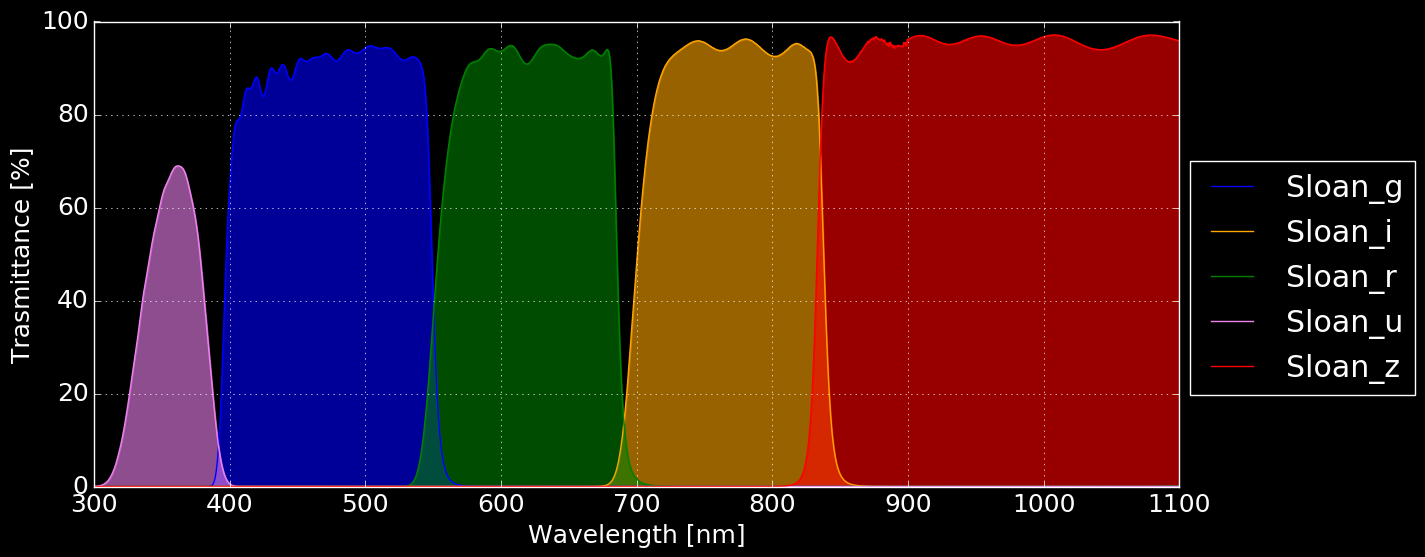

In [6]:
plt.clf()
    
    ## too lazy to auto select the colors,
colors = ("blue","orange", "g", "violet", "red")

i = 0
for filename in os.listdir(Filter_dir):
    
    if filename.endswith(".txt"):
        
        label = filename[0:-4]
        X,Y = np.genfromtxt(Filter_dir+filename, unpack=True)
        plt.plot(X, Y, label=label, color=colors[i])
        plt.fill_between(X, np.zeros(len(X)), Y, alpha=0.6, color=colors[i])

        i += 1
rcParams['figure.figsize'] = 14, 6
rcParams.update({'font.size': 18})
        
plt.legend(bbox_to_anchor=(1.01, 0.7), loc=2, borderaxespad=0.)


plt.xlim(300,1100)
plt.xlabel("Wavelength [nm]")

plt.ylim(0, 100)
plt.ylabel("Trasmittance [%]")

plt.grid()
plt.savefig(out_dir+"filters.png", bbox_inches="tight")
plt.show()


## Part 1: SED Plotting

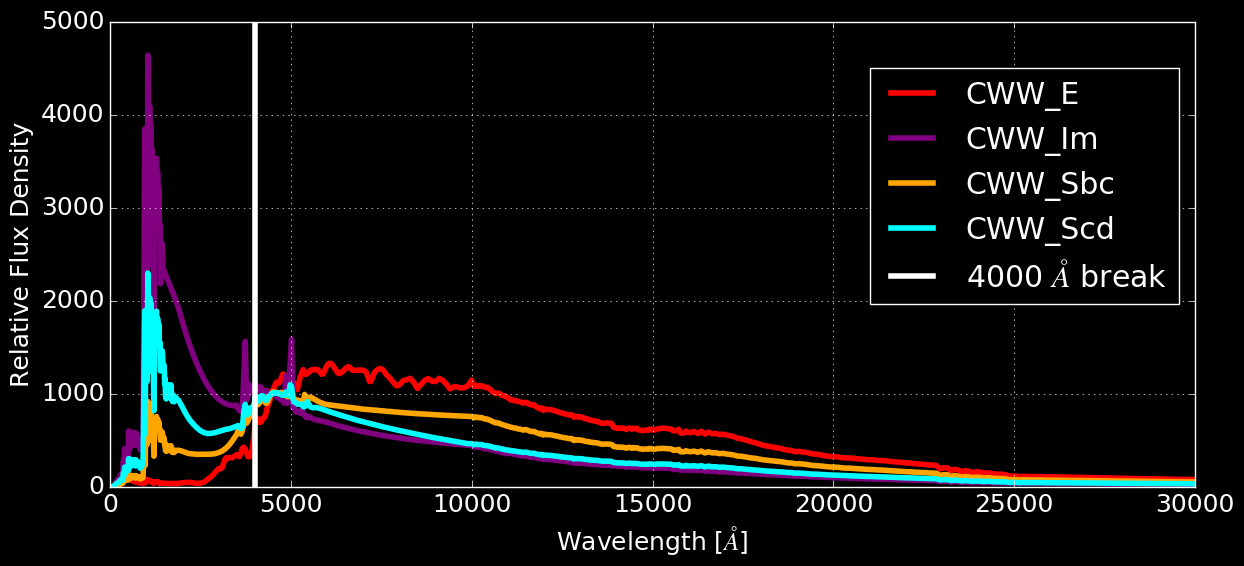

In [37]:
f, ax = plt.subplots()

cmap_i = 0

#ax.set_xscale("log", nonposx='clip')
#ax.set_yscale("log", nonposy='clip')

for filename in os.listdir(SED_dir):
    if filename.endswith(".sed"):
        label = filename[0:-8]
        X,Y = np.genfromtxt(SED_dir+filename, unpack=True)
        ax.plot(X, Y, label=label, lw=4, color=cmap[cmap_i])
        
        cmap_i += 1

rcParams['figure.figsize'] = 14, 6
rcParams.update({'font.size': 18})

plt.axvline(x=4000, lw=4, label="4000 $\AA$ break")
ax.set_xlim(0,30000)
ax.set_xlabel("Wavelength [$\AA$]")


ax.set_ylabel("Relative Flux Density")

ax.legend(bbox_to_anchor=(0.7, 0.9), loc=2, borderaxespad=0.)

plt.grid()
plt.savefig(out_dir+"SEDs.png", bbox_inches="tight")
plt.show()

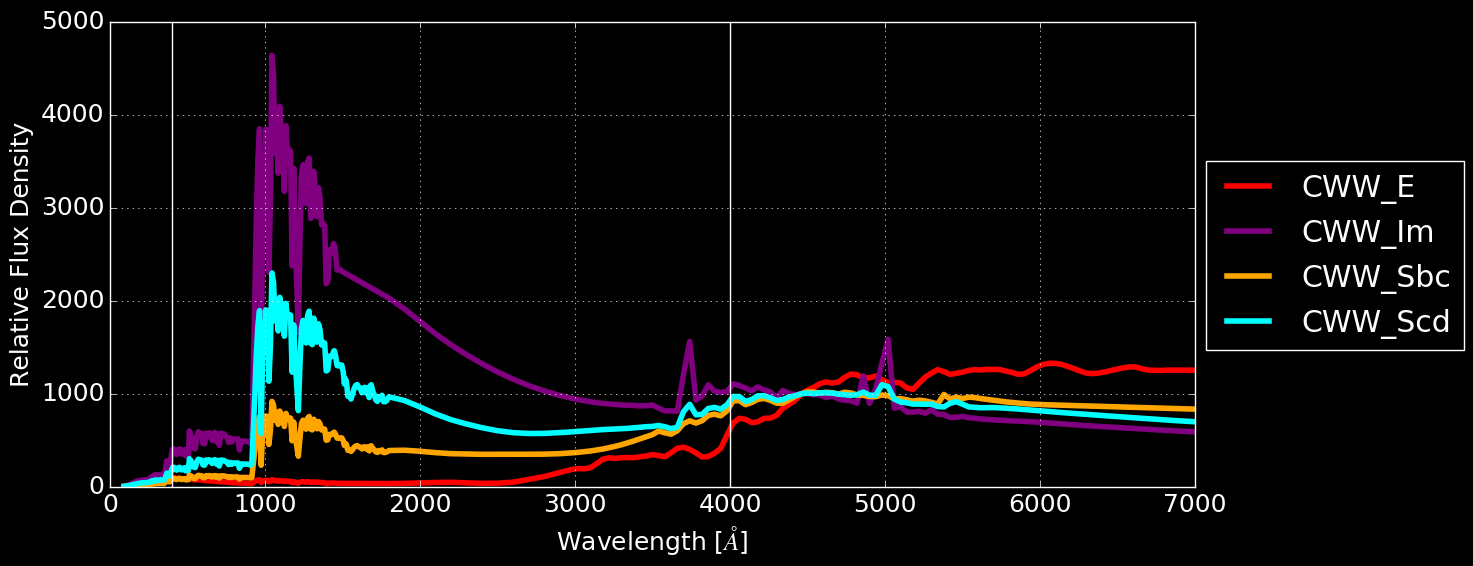

In [23]:
f, ax = plt.subplots()

cmap_i = 0

#ax.set_xscale("log", nonposx='clip')
#ax.set_yscale("log", nonposy='clip')

for filename in os.listdir(SED_dir):
    if filename.endswith(".sed"):
        label = filename[0:-8]
        X,Y = np.genfromtxt(SED_dir+filename, unpack=True)
        ax.plot(X, Y, label=label, lw=4, color=cmap[cmap_i])
        
        cmap_i += 1

rcParams['figure.figsize'] = 14, 6
rcParams.update({'font.size': 18})

plt.axvline(x=4000)
ax.set_xlim(0,7000)
ax.set_xlabel("Wavelength [$\AA$]")


ax.set_ylabel("Relative Flux Density")

ax.legend(bbox_to_anchor=(1.01, 0.7), loc=2, borderaxespad=0.)

plt.grid()
plt.savefig(out_dir+"SEDs.png", bbox_inches="tight")
plt.show()

## Calculate u - g
* u_g = -np.log10(flux_u/ flux_g)
* galaxy flux, galaxy lambda (\AA), filter flux ?, Filter lambda (nm)

## Steps:
* Convert galaxy lambda \AA to nm
* normalize transmittance to 0 to 1
* Interpolate Flux though filter = np.interp(lambda_u, wavlength of galaxy, flux of the galaxy)


## Part 2: SED Colors

In [3]:
def get_transmittance(color):
    '''
    Params:
        color : color abbrev (u,g,r,i,z)
    Output:
        Dictionary with keys:
            color_lambda : wavelength of color
            color_trans : transmittance of color scaled to 0 to 1
    '''
    
    X,Y = np.genfromtxt(Filter_dir+"Sloan_"+color+".txt", unpack=True)
    
    norm_Y = np.flipud(Y)
    norm_Y = norm_Y - min(norm_Y)
    #norm_Y = (Y - min(Y))/(max(Y)-min(Y))
    
    X = np.flipud(X)    
    
    test = {color+"_lambda": X, color+"_trans" : norm_Y}

    return test

def transmittance_dict(colors_array):
    '''
    Params:
        colors_array : array of color abbrev (u,g,r,i,z)
    Output:
        Dictionary of dictionaries, for each color:
            color_lambda : wavelength of color
            color_trans : transmittance of color scaled to 0 to 1 !!
    '''
    
    test = {}
    for color in colors_array:

        test.update(get_transmittance(color))
    
    return test

In [4]:
filters = ("u", "g", "r", "i", "z")
filter_data = transmittance_dict(filters)

print filter_data["z_trans"]

[2.13495900e-03 1.85990300e-03 1.75941600e-03 ... 9.59543158e+01
 9.59062583e+01 9.58687446e+01]


## Colors at z = 0

In [16]:
def color(SED, color1, color2):
    '''
    Params:
        SED : input SED file
        color1 : First color
        color2 : Second color
        
    Output:
        prints corrected magnitude of color1 - corrected magnitude of color2
    '''
    
    galaxy_lambda, galaxy_flux = np.genfromtxt(SED_dir+SED, unpack=True)
    
    galaxy_lambda = galaxy_lambda*0.1
    
    flux_filter_1 = np.interp(galaxy_lambda, (filter_data[color1+"_lambda"]), (filter_data[color1+"_trans"]))
    trans_flux_1 = flux_filter_1 * galaxy_flux
    
    final_flux_1 = np.trapz(trans_flux_1, x=galaxy_lambda)
    
    flux_filter_2 = np.interp(galaxy_lambda, (filter_data[color2+"_lambda"]), (filter_data[color2+"_trans"]))
    trans_flux_2 = flux_filter_2 * galaxy_flux
    
    final_flux_2 = np.trapz(trans_flux_2, x=galaxy_lambda)
    

    color = -2.5*np.log10(final_flux_1 / final_flux_2)
    
    print("\t %s - %s : %s")%(color1, color2, color)

    ##plt.plot(galaxy_lambda, trans_flux_1, label=color1)
    ##plt.plot(galaxy_lambda, trans_flux_2, label=color2)
    
    ##plt.legend()
    ##plt.show()

for filename in os.listdir(SED_dir):
    if filename.endswith(".sed"):
        print(filename[0:-8])
        
        color(filename, "u", "g")
        color(filename, "g", "r")
        color(filename, "r", "i")
        color(filename, "i", "z")
        color(filename, "u", "r")
        

CWW_E
	 u - g : 2.6915107781309002
	 g - r : 0.09813680456739057
	 r - i : -0.023995553230490158
	 i - z : 2.0744128297076534
	 u - r : 2.789647582698291
CWW_Im
	 u - g : 1.5440346070693145
	 g - r : -0.5211411453331879
	 r - i : -0.17427458715854127
	 i - z : 1.739947771148655
	 u - r : 1.0228934617361267
CWW_Sbc
	 u - g : 2.047364515394934
	 g - r : -0.20696831684735337
	 r - i : -0.04077852635579497
	 i - z : 2.034219655618143
	 u - r : 1.8403961985475803
CWW_Scd
	 u - g : 1.8748739581607028
	 g - r : -0.32774578619755584
	 r - i : -0.19209344868886594
	 i - z : 1.76235376408733
	 u - r : 1.547128171963147


## Part 3: Redshift

In [5]:
def r_shift_lambda(lambda_emit, redshift):
    return (1+redshift)*lambda_emit

redshifts = np.arange(0, 1.55, 0.05)

In [7]:
def color(SED, color1, color2, z):
    '''
    Params:
        SED : input SED file
        color1 : First color
        color2 : Second color
        
    Output:
        prints corrected magnitude of color1 - corrected magnitude of color2
    '''
    
    galaxy_lambda, galaxy_flux = np.genfromtxt(SED_dir+SED, unpack=True)
    
    galaxy_lambda = galaxy_lambda*0.1
    
    shift_galaxy_lambda = r_shift_lambda(galaxy_lambda, z)
    
    flux_filter_1 = np.interp(shift_galaxy_lambda, (filter_data[color1+"_lambda"]), (filter_data[color1+"_trans"]))
    trans_flux_1 = flux_filter_1 * galaxy_flux
    
    final_flux_1 = np.trapz(trans_flux_1, x=shift_galaxy_lambda)
    
    flux_filter_2 = np.interp(shift_galaxy_lambda, (filter_data[color2+"_lambda"]), (filter_data[color2+"_trans"]))
    trans_flux_2 = flux_filter_2 * galaxy_flux
    
    final_flux_2 = np.trapz(trans_flux_2, x=shift_galaxy_lambda)
    

    color = -2.5*np.log10(final_flux_1 / final_flux_2)
    
    return color
    ##print("\t %s - %s : %s")%(color1, color2, color)


'\ndef color(SED, color1, color2, z):\n    galaxy_lambda, galaxy_flux = np.genfromtxt(SED_dir+SED, unpack=True)\n    \n    galaxy_lambda = galaxy_lambda*0.1\n    \n    shift_galaxy_lambda = r_shift_lambda(galaxy_lambda, z)\n    \n    ##shift_filter_lambda_1 = r_shift_lambda(filter_data[color1+"_lambda"], z)\n    \n    flux_filter_1 = np.interp((filter_data[color1+"_lambda"]), shift_galaxy_lambda, galaxy_flux)\n    trans_flux_1 = flux_filter_1 * filter_data[color1+"_trans"]\n    \n    final_flux_1 = np.trapz(trans_flux_1, dx=0.5)\n    \n    ##shift_filter_lambda_2 = r_shift_lambda(filter_data[color2+"_lambda"], z)\n    \n    flux_filter_2 = np.interp((filter_data[color2+"_lambda"]), shift_galaxy_lambda, galaxy_flux)\n    trans_flux_2 = flux_filter_2 * filter_data[color2+"_trans"]\n    \n    final_flux_2 = np.trapz(trans_flux_2, dx=0.5)\n    \n\n    color = -2.5*np.log10(final_flux_1 / final_flux_2)\n    \n    ##print("\t %s - %s : %s")%(color1, color2, color)\n    \n    return color\n'

## Plotting Colors from z= 0 to 1.5

CWW_E
CWW_Im
CWW_Sbc
CWW_Scd


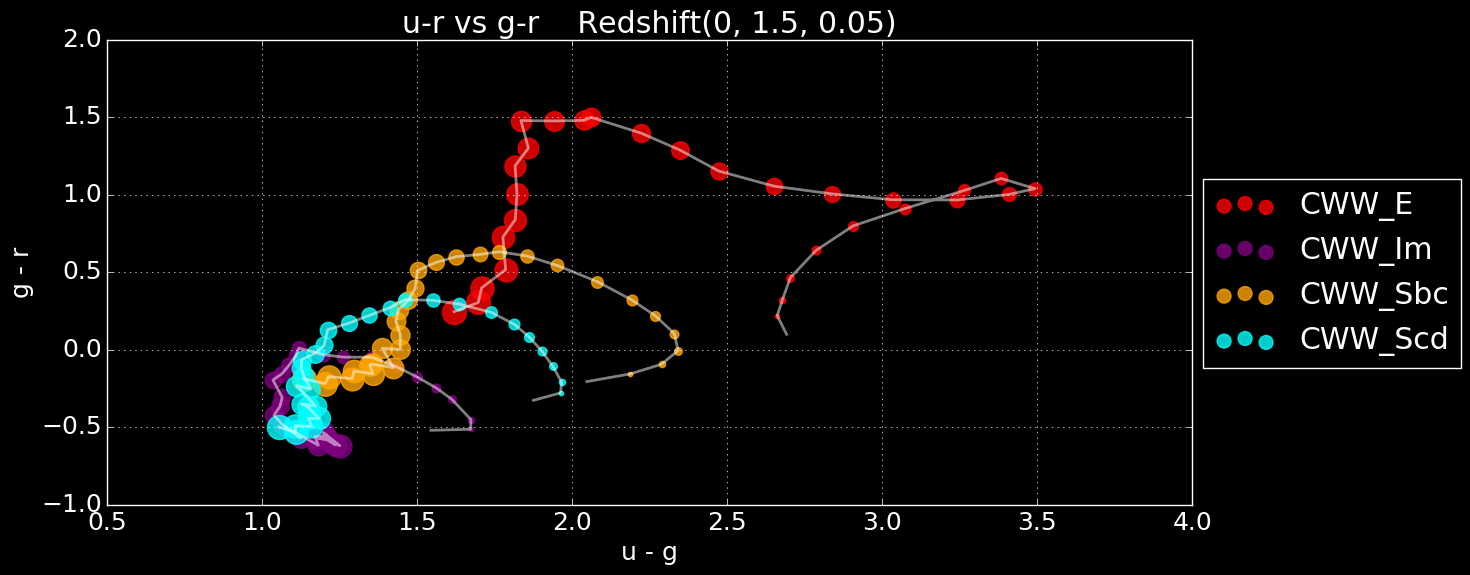

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)

rcParams['figure.figsize'] = 14, 6
rcParams.update({'font.size': 18})
    
cmap_i = 0

for filename in os.listdir(SED_dir):
    
    if filename.endswith(".sed"):
        print(filename[0:-8])
        
        out_u_g = []
        out_g_r = []
        
        for z in range(len(redshifts)):
            u_g = color(filename, "u", "g", redshifts[z])
            g_r = color(filename, "g", "r", redshifts[z])

            out_u_g.append(u_g)
            out_g_r.append(g_r)
            

    
    ax.plot(out_u_g, out_g_r, lw=2, color='white', alpha=0.5)
    
    bid = 0
    
    ## -- Plot scatter plot with variable point size
    for j in range(len(redshifts)):
        if bid == 10:
            ax.scatter(out_u_g[j], out_g_r[j], s = 200.0*(redshifts[j]),
                    color = cmap[cmap_i],
                    label = filename[0:-8],
                      alpha=0.8)

        else:
            ax.scatter(out_u_g[j], out_g_r[j], s = 200.0*(redshifts[j]),
                color = cmap[cmap_i],
                      alpha=0.8)

        bid += 1
    
    cmap_i += 1

ax.set_title("u-r vs g-r    Redshift(0, 1.5, 0.05)")
ax.set_xlabel("u - g")
ax.set_ylabel("g - r")

plt.legend(bbox_to_anchor=(1.01, 0.7), loc=2, borderaxespad=0.)
plt.grid()

plt.savefig(out_dir+"UR_GR_1.png", bbox_inches="tight")
plt.show()